In [1]:
# Drwaing boxplot based on pclass
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df_titanic=pd.read_csv("titanic_train.csv")
cls1 = df_titanic[df_titanic['Pclass']==1]['Age'].dropna()
cls2 = df_titanic[df_titanic['Pclass']==2]['Age'].dropna()
cls3 = df_titanic[df_titanic['Pclass']==3]['Age'].dropna()

{'whiskers': [<matplotlib.lines.Line2D at 0x1c8fda55710>,
 'caps': [<matplotlib.lines.Line2D at 0x1c8fdf4a310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c8fdefc7d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1c8fdf78810>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c8fdf792d0>,
 'means': []}

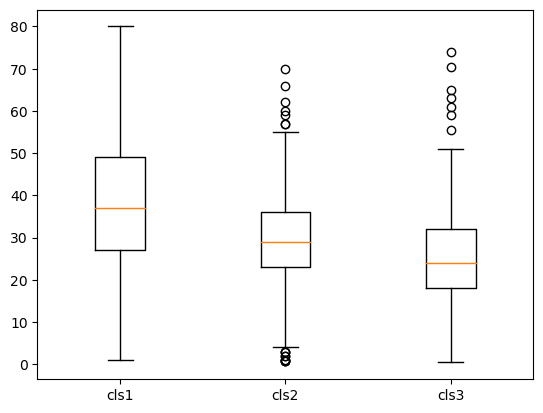

In [2]:
l1 = [cls1,cls2,cls3]
plt.boxplot(l1, labels=["cls1","cls2","cls3"])

In [3]:
# Permanently renaming sex field to "gender"
df_titanic.rename(columns={"Sex":"Gender"}, inplace=True)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Converting male to 0 and female to 1
df_titanic['Gender'] = df_titanic['Gender'].map({'male':0, 'female':1})
df_titanic
# or
# df_titanic['Gender'] = df_titanic['Gender'].replace({'male':0, 'female':1})
# df_titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Selecting data age < 25 and gender 1
((df_titanic['Age']<25) & (df_titanic['Gender']==1)).sum()

117

In [6]:
# Selecting how many male and female survived
gender = ['Male','Female']
male = ((df_titanic['Gender']==0) & (df_titanic['Survived'])).sum()
female = ((df_titanic['Gender']==1) & (df_titanic['Survived'])).sum()
print(male)
print(female)

109
233


Text(0.5, 1.0, 'Count Plot')

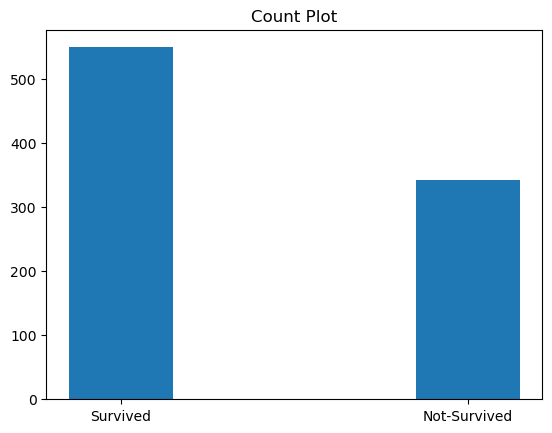

In [7]:
# Showing count of survivors and non-survivors
gender = ["Survived","Not-Survived"]
survived =  (df_titanic['Survived']==0).sum()
not_survived =(df_titanic['Survived']==1).sum()
count=[survived,not_survived]
plt.bar(gender,count, width=0.3)
plt.title("Count Plot")

In [8]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\tanut\AppData\Local\Temp\ipykernel_19500\3279888165.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'], bins=100, kde=True, hist=True, color="purple")


<Axes: xlabel='total_bill', ylabel='Density'>

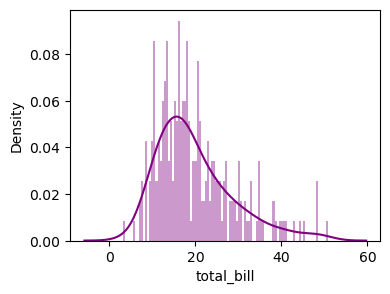

In [9]:
# distplot
# It will take only one column

plt.figure(figsize=(4,3))
sns.distplot(tips['total_bill'], bins=100, kde=True, hist=True, color="purple")

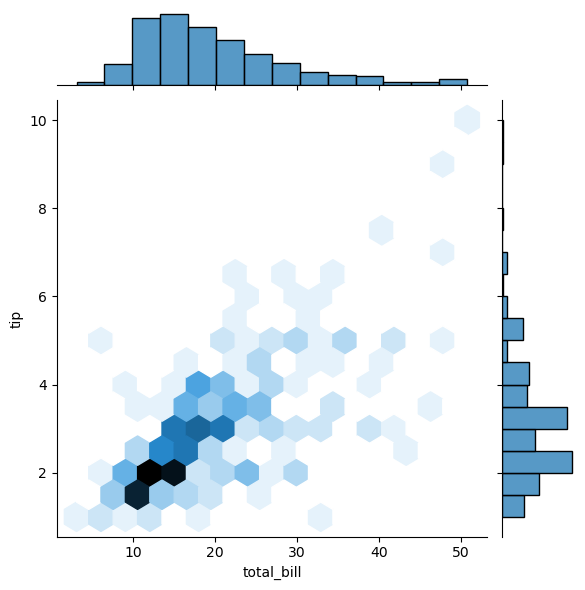

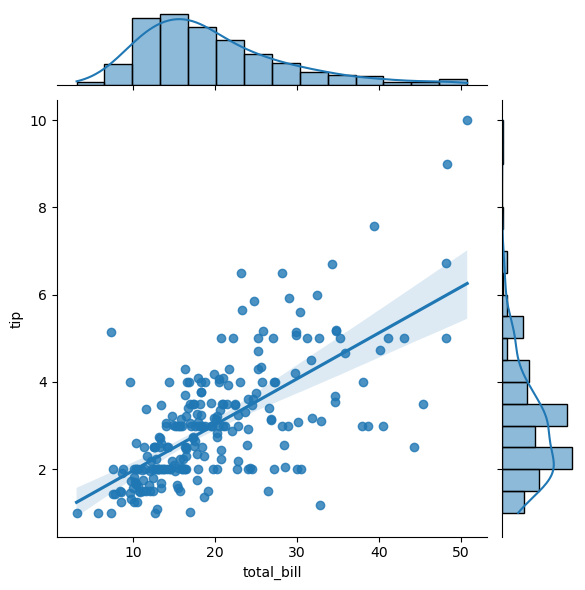

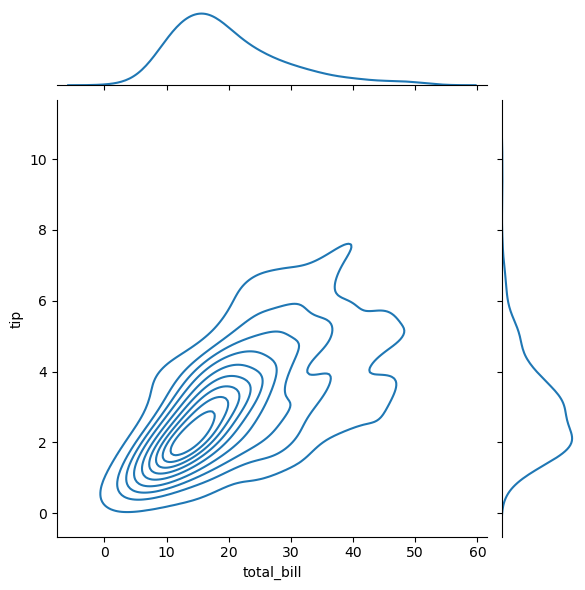

In [10]:
# jointplot
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


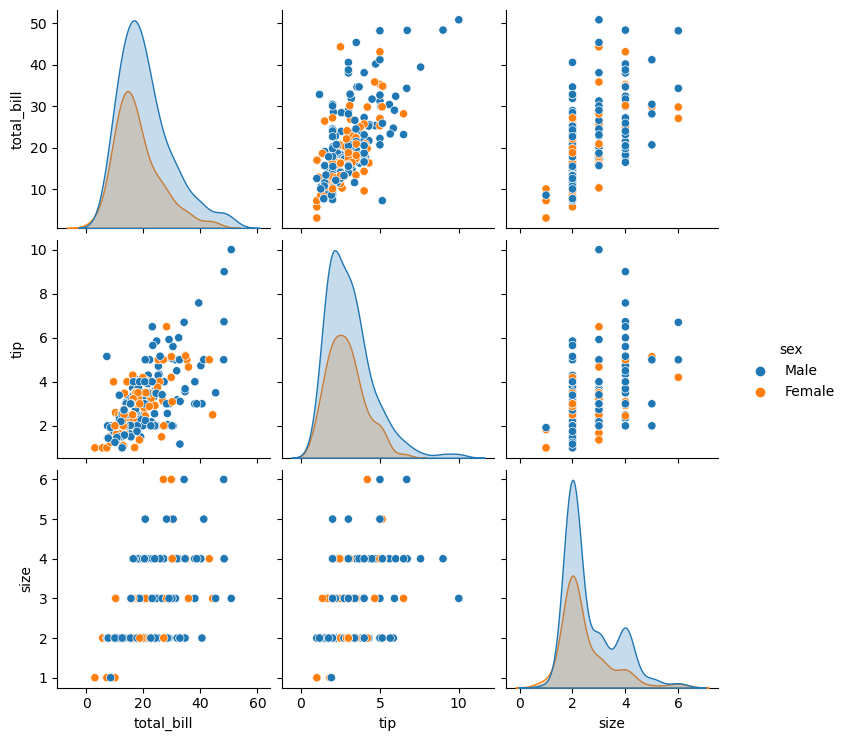

In [11]:
# Pairplot
sns.pairplot(tips, hue="sex")

In [12]:
# ML Algorithms
# logistical regression is the statistical method used to model the relationship between a binary dependent variable 
# and one or more independent variables

# In logistic regression, the dependent variable is binary, meaning it can take only two values 0 or 1

import numpy as np
from sklearn .metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [13]:
y_pred = np.array([0.9,0.9,0.8,0.9,0.9,0.9,0.9,0.7,0.5,0.6])
y_true = np.array([0,1,1,0,0,1,0,1,0,1])

In [14]:
#Accuracy measures the percentage of correctly classified instances and out of all instances
accuracy = accuracy_score(y_true, np.round(y_pred))
accuracy

0.6

In [15]:
# Precision

# Precision measured the proportion of true positive prediction out of all positive predictions
# Precision = true positive/all positive
precision = precision_score(y_true, np.round(y_pred))
precision

0.5555555555555556

In [16]:
# Recall

# Recall = true positive/actual positive
# Recall measures the proportion of true positive prediction out of all actual positive cases
recall = recall_score(y_true, np.round(y_pred))
recall

1.0

In [17]:
# F1 score
# It is the mean of precision and recall
f1_score = f1_score(y_true, np.round(y_pred))
f1_score

0.7142857142857143

In [18]:
# Confusion matrix
# It is a table that gives the performance of a classification model.
# It shows true positive, true negative, false positive, false negative
matrix = confusion_matrix(y_true, np.round(y_pred))
matrix

array([[1, 4],
       [0, 5]], dtype=int64)

In [19]:
# Eg-1
# Logistic Regression
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [20]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target_names'] = iris.target_names[iris.target]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [21]:
# seperate dependent variable and independent variable
x = iris.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [22]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)
x_train.shape
x_test.shape

(30, 4)

In [24]:
clf = LogisticRegression()

In [25]:
# To train the algorithm
clf.fit(x_train, y_train)

LogisticRegression()

In [26]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0])

In [27]:
d = pd.read_csv("bmi.csv")
d

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [28]:
g1 = (d['Gender']=='Female').sum()
g2 = (d['Gender']=='Male').sum()
g = [g1,g2]
g

[255, 245]

In [29]:
# Converting male to 0 and female to 1
d['Gender'] = d['Gender'].map({'Male':0, 'Female':1})
d

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3
...,...,...,...,...
495,1,150,153,5
496,1,184,121,4
497,1,141,136,5
498,0,150,95,5


<Axes: xlabel='Index', ylabel='Height'>

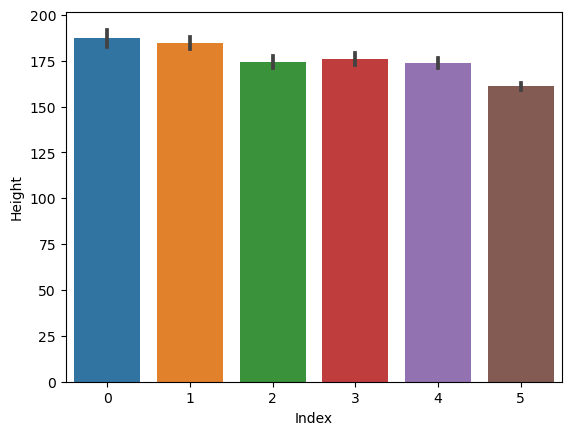

In [30]:
import seaborn as sns
sns.barplot(y="Height",x="Index",data=d)